Enter the normal stress along x direction
100
Enter the normal stress along y direction
200
Enter the shear stress along x direction
120
Enter the angle in degrees: +ve for anticlockwise rotation, -ve for clockwise rotation
150


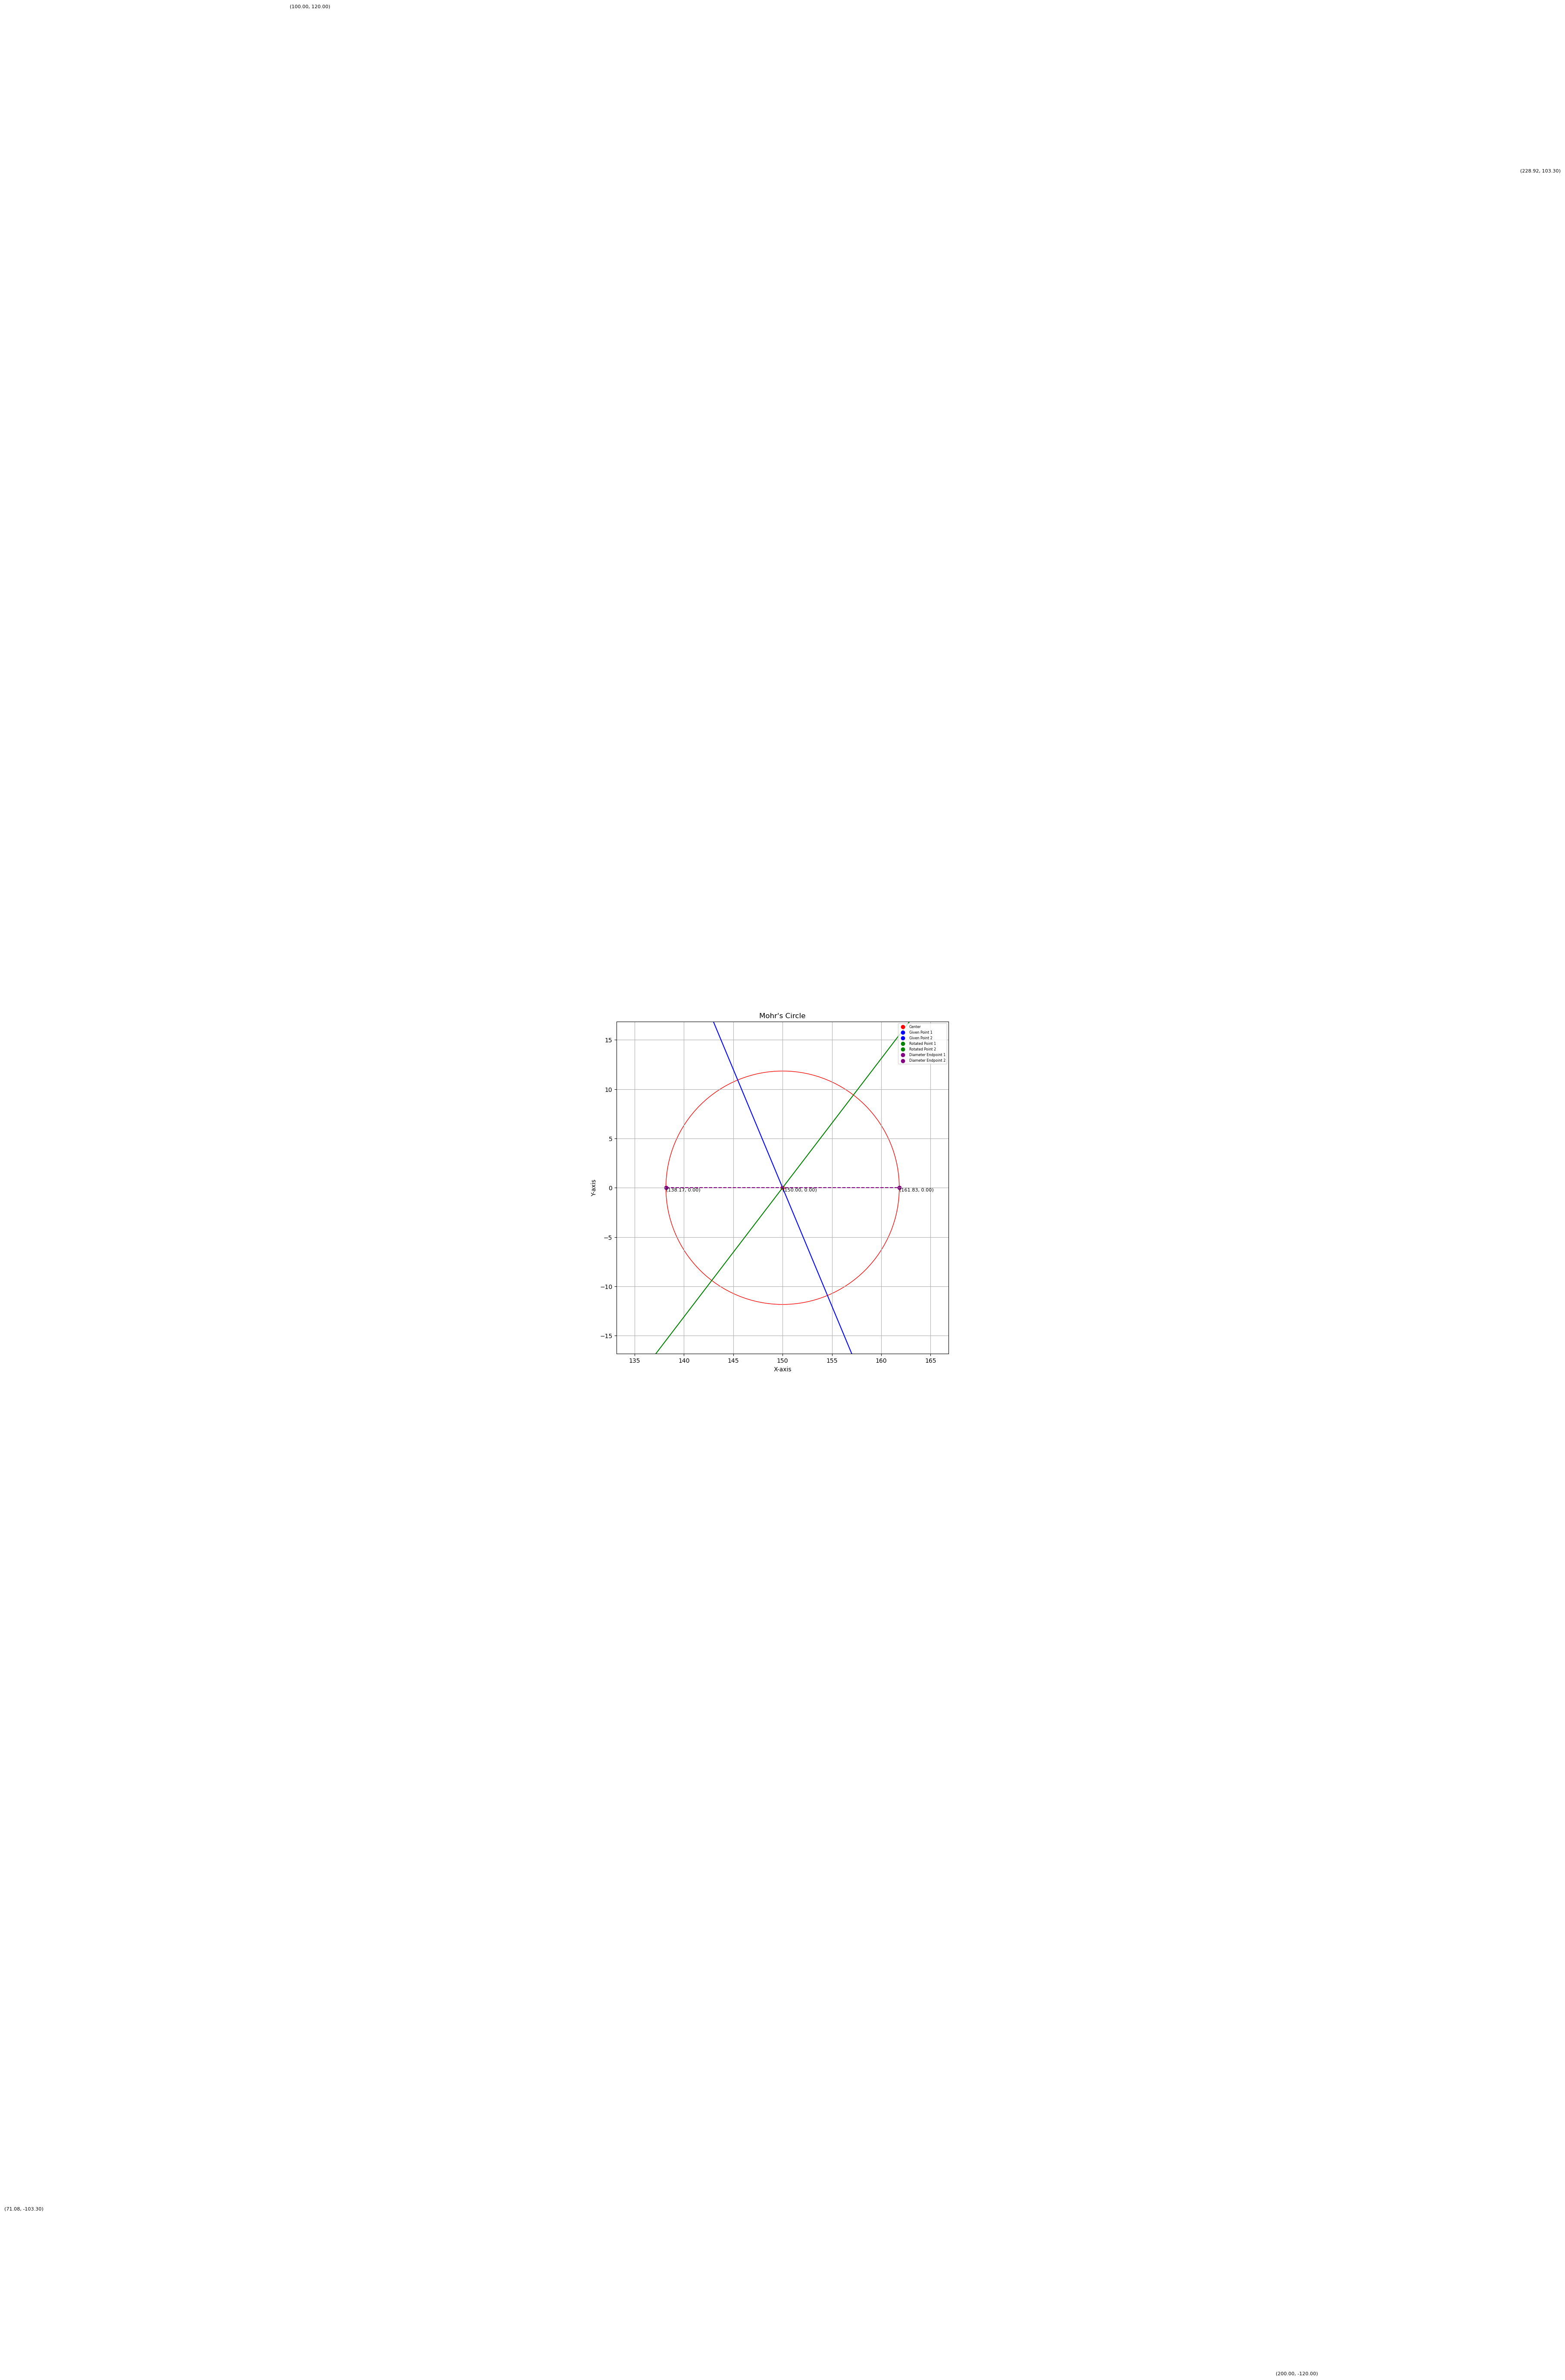

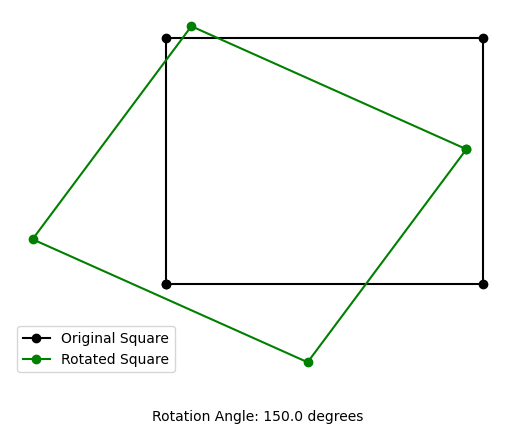

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

def rotate_line(point1, point2, angle):
    """
    Rotates the line joining two points through an angle.

    Args:
        point1: The first point.
        point2: The second point.
        angle: The angle to rotate by in radians.

    Returns:
        The rotated line.
    """

    # Calculate the midpoint of the line.
    midpoint = (point1[0] + point2[0]) / 2, (point1[1] + point2[1]) / 2

    # Calculate the vector from the midpoint to the first point.
    vector1 = (point1[0] - midpoint[0], point1[1] - midpoint[1])

    # Calculate the vector from the midpoint to the second point.
    vector2 = (point2[0] - midpoint[0], point2[1] - midpoint[1])

    # Rotate the vectors by the angle.
    rotated_vector1 = math.cos(angle) * vector1[0] - math.sin(angle) * vector1[1], math.cos(angle) * vector1[1] + math.sin(angle) * vector1[0]
    rotated_vector2 = math.cos(angle) * vector2[0] - math.sin(angle) * vector2[1], math.cos(angle) * vector2[1] + math.sin(angle) * vector2[0]

    # Add the rotated vectors to the midpoint to get the endpoints of the rotated line.
    return (midpoint[0] + rotated_vector1[0], midpoint[1] + rotated_vector1[1]), (midpoint[0] + rotated_vector2[0], midpoint[1] + rotated_vector2[1])

# User inputs
print('Enter the normal stress along x direction')
pxx = float(input())
print('Enter the normal stress along y direction')
pyy = float(input())
print('Enter the shear stress along x direction')
txy = float(input())
print('Enter the angle in degrees: +ve for anticlockwise rotation, -ve for clockwise rotation')
angle_in_degrees = float(input())

# Convert degrees to radians
angle_in_radians = math.radians(angle_in_degrees)

# Scaling factor for the circle size
scaling_factor = 1

# Calculate center and scaled radius
center = ((pxx + pyy) / 2, 0)
radius = scaling_factor * ((((pxx - pyy) / 2) * 2 + txy * 2) ** 0.5)

# Calculate given points and their rotated counterparts
givenpoint1 = (pxx, txy)
givenpoint2 = (pyy, -txy)
rotated_line = rotate_line(givenpoint1, givenpoint2, 2 * angle_in_radians)
afrotpoint1 = (rotated_line[0][0], rotated_line[0][1])
afrotpoint2 = (rotated_line[1][0], rotated_line[1][1])

# Calculate endpoints of the diameter (where the circle intersects with the x-axis)
diameter_endpoints = [(center[0] - radius, 0), (center[0] + radius, 0)]

# Plotting
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

# Plot the circle
circle = plt.Circle(center, radius, fill=False, color='red', linestyle='-')
ax.add_patch(circle)

# Set aspect ratio to be equal
ax.set_aspect('equal', adjustable='box')

# Set axis limits based on center and radius
ax.set_xlim(center[0] - radius-5, center[0] + radius+5)
ax.set_ylim(center[1] - radius-5, center[1] + radius+5)

# Plot points and lines
ax.scatter(*center, color='red', label='Center')
ax.scatter(*givenpoint1, color='blue', label='Given Point 1')
ax.scatter(*givenpoint2, color='blue', label='Given Point 2')
ax.scatter(*afrotpoint1, color='green', label='Rotated Point 1')
ax.scatter(*afrotpoint2, color='green', label='Rotated Point 2')
ax.scatter(*diameter_endpoints[0], color='purple', label='Diameter Endpoint 1')
ax.scatter(*diameter_endpoints[1], color='purple', label='Diameter Endpoint 2')

# Plot lines
ax.plot([givenpoint1[0], givenpoint2[0]], [givenpoint1[1], givenpoint2[1]], marker='o', linestyle='-', color='blue')
ax.plot([afrotpoint1[0], afrotpoint2[0]], [afrotpoint1[1], afrotpoint2[1]], marker='o', linestyle='-', color='green')
ax.plot([diameter_endpoints[0][0], diameter_endpoints[1][0]], [diameter_endpoints[0][1], diameter_endpoints[1][1]], linestyle='--', color='purple')

for point, label in zip([center, givenpoint1, givenpoint2, afrotpoint1, afrotpoint2, diameter_endpoints[0], diameter_endpoints[1]],
                        ['Center', 'Given Point 1', 'Given Point 2', 'Rotated Point 1', 'Rotated Point 2', 'Diameter Endpoint 1', 'Diameter Endpoint 2']):
    ax.text(point[0], point[1], f'({point[0]:.2f}, {point[1]:.2f})', ha='right' if label == 'Rotated Point 1' else 'left', va='top', fontsize=8)


# Labeling
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Mohr\'s Circle')
plt.legend(loc='upper right', fontsize='xx-small')
plt.grid(True)
plt.show()


def rotate_point(point, angle, center):
    """
    Rotate a point around a center by a given angle.

    Args:
        point: The point to rotate.
        angle: The rotation angle in degrees.
        center: The center of rotation.

    Returns:
        The rotated point.
    """
    angle_rad = np.radians(angle)
    rotated_x = center[0] + (point[0] - center[0]) * np.cos(angle_rad) - (point[1] - center[1]) * np.sin(angle_rad)
    rotated_y = center[1] + (point[0] - center[0]) * np.sin(angle_rad) + (point[1] - center[1]) * np.cos(angle_rad)
    return rotated_x, rotated_y

# Create a figure and axes
fig, ax = plt.subplots()

# Turn off axis display
ax.set_axis_off()

# Define the vertices of the original square
square_vertices = np.array([[2, 2], [2, 8], [8, 8], [8, 2], [2, 2]])

# Plot the original square
ax.plot(square_vertices[:, 0], square_vertices[:, 1], color='black', marker='o', linestyle='-', label='Original Square')

# Rotate the square by a certain angle
#angle_in_degrees = -30
# Set the rotation angle in degrees
rotation_center = square_vertices.mean(axis=0)  # Use the center of the square as the rotation center

rotated_square = np.array([rotate_point(point, angle_in_degrees, rotation_center) for point in square_vertices])

# Plot the rotated square
ax.plot(rotated_square[:, 0], rotated_square[:, 1], color='green', marker='o', linestyle='-', label='Rotated Square')

# Show the legend
ax.legend()

# Add text to show the rotation angle
angle_text = f'Rotation Angle: {angle_in_degrees} degrees'
ax.text(0.5, -0.1, angle_text, ha='center', va='center', transform=ax.transAxes)


# Show the plot
plt.show()